In [ ]:
# city2graph package = network data set
# https://city2graph.net/latest/

In [ ]:
# Purpose: Analyze if main utilities and amenities are accessible in city within 15 min walk then it is a livable spot

In [ ]:
!pip install city2graph

In [23]:
import osmnx as ox
import city2graph
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from matplotlib.lines import Line2D
from shapely.geometry import box

city2graph.__version__

'0.2.0'

# Testing the City2Graph Package

<Axes: >

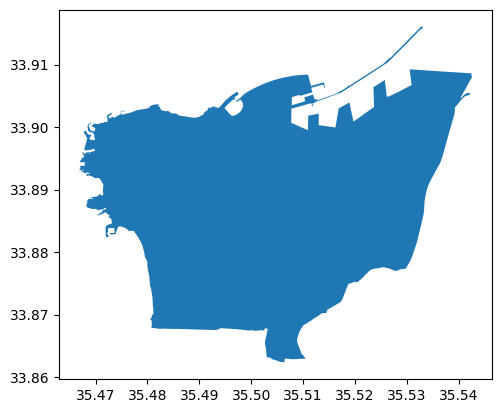

In [122]:
city_name = 'Beirut'
admin = ox.geocode_to_gdf(city_name)
admin.plot()

In [123]:
poi_gdf = ox.features_from_place(city_name, {'amenity': ['hospital', 'clinic', 'doctors', 'pharmacy']}).to_crs(3857)
poi_gdf['geometry'] = poi_gdf.geometry.centroid
poi_gdf = poi_gdf.dropna(subset=['geometry']).reset_index(drop=True)
poi_gdf

,geometry,alt_name,amenity,contact:email,contact:fax,contact:phone,contact:website,healthcare,name,name:en,...,tourism,alt_name:en,contact:facebook,outdoor_seating,website,building,source,wikidata,wikipedia,office
0,POINT (3953518.461 4014801.778),Hospital Rosaire,hospital,info@hopitalrosaire.org,+9611446668,+9611440800,http://www.hopitalrosaire.org/,hospital,Rosary Sisters Hospital,Rosary Sisters Hospital,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,POINT (3952452.243 4012426.502),NaN,hospital,NaN,NaN,NaN,NaN,hospital,البربير - سابقاً,Barbir (closed),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,POINT (3952257.045 4012010.088),NaN,pharmacy,NaN,NaN,NaN,NaN,pharmacy,الطوارئ,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,POINT (3950615.45 4014531.333),NaN,hospital,NaN,NaN,NaN,NaN,hospital,بيضون,Beidoun,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,POINT (3950401.438 4014910.61),الوردية,pharmacy,NaN,NaN,NaN,NaN,pharmacy,وردية حمرا,Wardieh pharmacy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,POINT (3950564.63 4013114.903),NaN,pharmacy,NaN,NaN,NaN,NaN,pharmacy,Sammak pharmacy,NaN,...,NaN,NaN,NaN,NaN,NaN,detached,NaN,NaN,NaN,NaN
243,POINT (3952191.531 4013703.957),NaN,pharmacy,NaN,NaN,NaN,NaN,pharmacy,ayoub,NaN,...,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN
244,POINT (3953534.224 4013405.279),LAU Medical Center-Rizk Hospital,hospital,info@laumcrh.com,+9611200816,+9611200800,https://www.laumcrh.com/,hospital,رزق,Rizk Hospital,...,NaN,NaN,https://www.facebook.com/LAUMCRH,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,POINT (3953970.255 4012973.631),Hotel Dieu,hospital,NaN,NaN,NaN,NaN,hospital,أوتيل ديو,Hôtel Dieu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

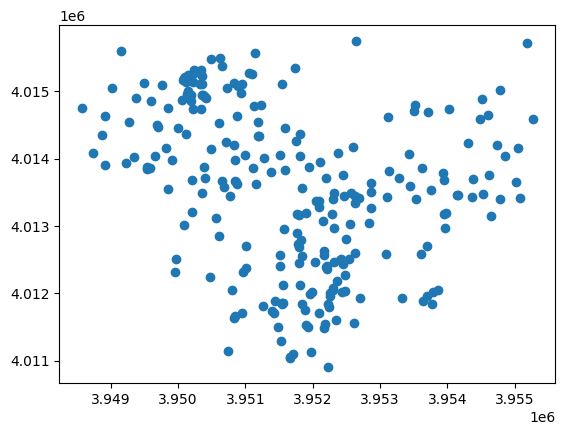

In [124]:
poi_gdf.plot()

In [125]:
poi_gdf

,geometry,alt_name,amenity,contact:email,contact:fax,contact:phone,contact:website,healthcare,name,name:en,...,tourism,alt_name:en,contact:facebook,outdoor_seating,website,building,source,wikidata,wikipedia,office
0,POINT (3953518.461 4014801.778),Hospital Rosaire,hospital,info@hopitalrosaire.org,+9611446668,+9611440800,http://www.hopitalrosaire.org/,hospital,Rosary Sisters Hospital,Rosary Sisters Hospital,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,POINT (3952452.243 4012426.502),NaN,hospital,NaN,NaN,NaN,NaN,hospital,البربير - سابقاً,Barbir (closed),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,POINT (3952257.045 4012010.088),NaN,pharmacy,NaN,NaN,NaN,NaN,pharmacy,الطوارئ,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,POINT (3950615.45 4014531.333),NaN,hospital,NaN,NaN,NaN,NaN,hospital,بيضون,Beidoun,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,POINT (3950401.438 4014910.61),الوردية,pharmacy,NaN,NaN,NaN,NaN,pharmacy,وردية حمرا,Wardieh pharmacy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,POINT (3950564.63 4013114.903),NaN,pharmacy,NaN,NaN,NaN,NaN,pharmacy,Sammak pharmacy,NaN,...,NaN,NaN,NaN,NaN,NaN,detached,NaN,NaN,NaN,NaN
243,POINT (3952191.531 4013703.957),NaN,pharmacy,NaN,NaN,NaN,NaN,pharmacy,ayoub,NaN,...,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN
244,POINT (3953534.224 4013405.279),LAU Medical Center-Rizk Hospital,hospital,info@laumcrh.com,+9611200816,+9611200800,https://www.laumcrh.com/,hospital,رزق,Rizk Hospital,...,NaN,NaN,https://www.facebook.com/LAUMCRH,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,POINT (3953970.255 4012973.631),Hotel Dieu,hospital,NaN,NaN,NaN,NaN,hospital,أوتيل ديو,Hôtel Dieu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
dir(city2graph)

['PackageNotFoundError',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'add_metapaths',
 'add_metapaths_by_weight',
 'base',
 'bridge_nodes',
 'contextlib',
 'contiguity_graph',
 'create_isochrone',
 'create_tessellation',
 'data',
 'delaunay_graph',
 'dual_graph',
 'euclidean_minimum_spanning_tree',
 'filter_graph_by_distance',
 'fixed_radius_graph',
 'gabriel_graph',
 'gdf_to_nx',
 'gdf_to_pyg',
 'get_od_pairs',
 'graph',
 'group_nodes',
 'is_torch_available',
 'knn_graph',
 'load_gtfs',
 'load_overture_data',
 'mobility',
 'morphological_graph',
 'morphology',
 'nx_to_gdf',
 'nx_to_pyg',
 'nx_to_rx',
 'od_matrix_to_graph',
 'plot_graph',
 'private_to_private_graph',
 'private_to_public_graph',
 'process_overture_segments',
 'proximity',
 'public_to_public_graph',
 'pyg_to_gdf',
 'pyg_to_nx',
 'relative_neighborhood_graph',
 'rx_to_nx',
 'segments_to_graph',
 'transportati

In [127]:
def plot_med_graph(edges_gdf, nodes_gdf, admin_gdf, title, color='#00ffff', alpha=0.5, linewidth=0.75):
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    admin_gdf.to_crs(epsg=3857).boundary.plot(ax=ax, color='white', linewidth=1.0, alpha=0.4)
    edges_gdf.to_crs(epsg=3857).plot(ax=ax, color=color, linewidth=linewidth, alpha=alpha)

    ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatterNoLabels)

    ax.set_axis_off()
    ax.set_title(title, fontsize=14, color='white', pad=12)
    plt.tight_layout()
    plt.show()

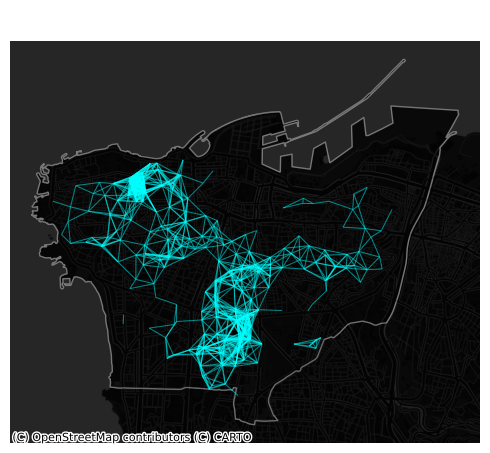

In [128]:
radius = 500

# Radius Proximity Graph
fixed_nodes, fixed_edges = city2graph.fixed_radius_graph(poi_gdf, radius = radius)

plot_med_graph(fixed_edges, poi_gdf, admin, 'Fixed-Radius Graph', color='#00ffff')

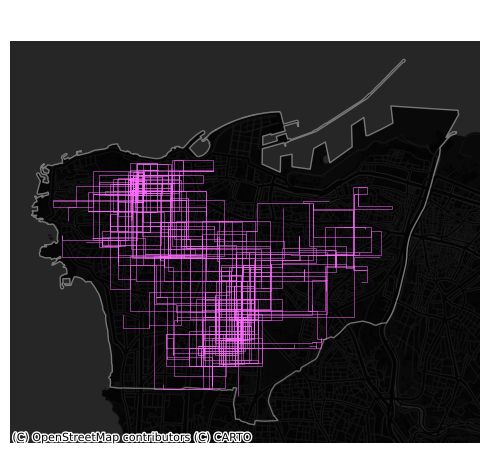

In [129]:
wax_l1_nodes, wax_l1_edges = city2graph.waxman_graph(
    poi_gdf,
    distance_metric='manhattan',
    r0=radius,
    beta=0.5
)


plot_med_graph(wax_l1_edges, poi_gdf, admin, 'Waxman (Manhattan Distance)', color='#ff6eff')

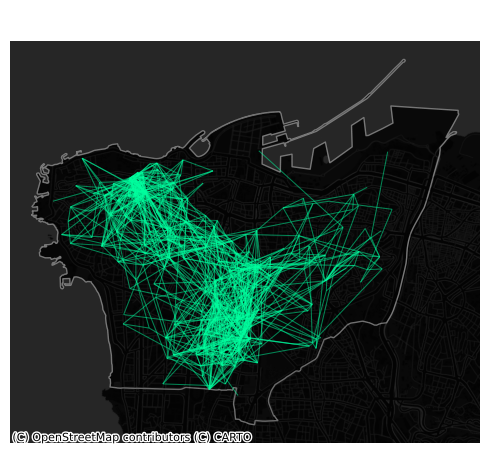

In [130]:
wax_l2_nodes, wax_l2_edges = city2graph.waxman_graph(
    poi_gdf,
    distance_metric='euclidean',
    r0=radius,
    beta=0.5
)


plot_med_graph(wax_l2_edges, poi_gdf, admin, 'Waxman (Euclidean Distance)', color='#00ff9f')

In [132]:
# Drive Paths Network
segments_gdf = ox.graph_to_gdfs(ox.graph_from_place(city_name, network_type='drive'))[1].to_crs(3857)
len(segments_gdf)

7451

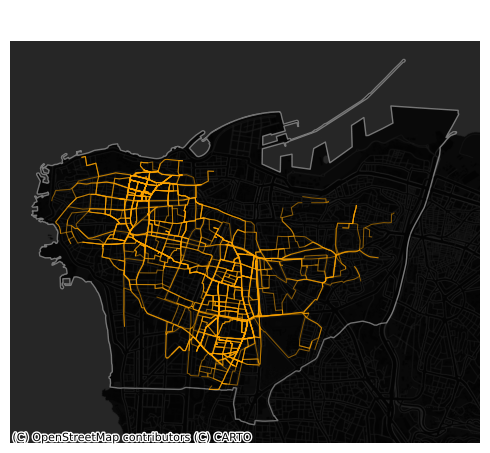

In [133]:
wax_net_nodes, wax_net_edges = city2graph.waxman_graph(
    poi_gdf,
    distance_metric='network',
    r0=radius,
    beta=0.5,
    network_gdf=segments_gdf
)


plot_med_graph(wax_net_edges, poi_gdf, admin, 'Waxman (Network Distance)', color='#ffa500')

In [134]:
# Shows which parts of the city are well connected within the distance radius to each other and to the med facilities

# Reaching Essential Services

In [135]:
admin = admin.to_crs(3857)

In [136]:
poi_queries = {
    'education': {'amenity': ['school', 'university']},
    'daily_needs': {'shop': ['supermarket', 'convenience']},
    'social_life': {'amenity': ['restaurant']},
    'health_services': {'amenity': ['hospital', 'clinic', 'pharmacy']}
}

In [137]:
poi_layers = {}
for label, query in poi_queries.items():
    poi = ox.features_from_place(city_name, query).to_crs(3857)
    poi_layers[label] = poi[poi.geometry.type == 'Point']
    print(label, len(poi))

education 73
daily_needs 154
social_life 305
health_services 237


In [138]:
wax_graphs = {}
radius = 500 # meters
for label, gdf in poi_layers.items():
    if len(gdf) > 1:
        nodes, edges = city2graph.waxman_graph(
            gdf,
            distance_metric = 'network',
            r0 = radius,
            beta = 0.5,
            network_gdf = segments_gdf
        )
        wax_graphs[label] = edges

In [139]:
len(wax_graphs)

4

In [142]:
layer_colors = {
    'education': '#00e5ff',
    'daily_needs': '#ffea00',
    'social_life': '#ff4081',
    'health_services': '#76ff03' 
}

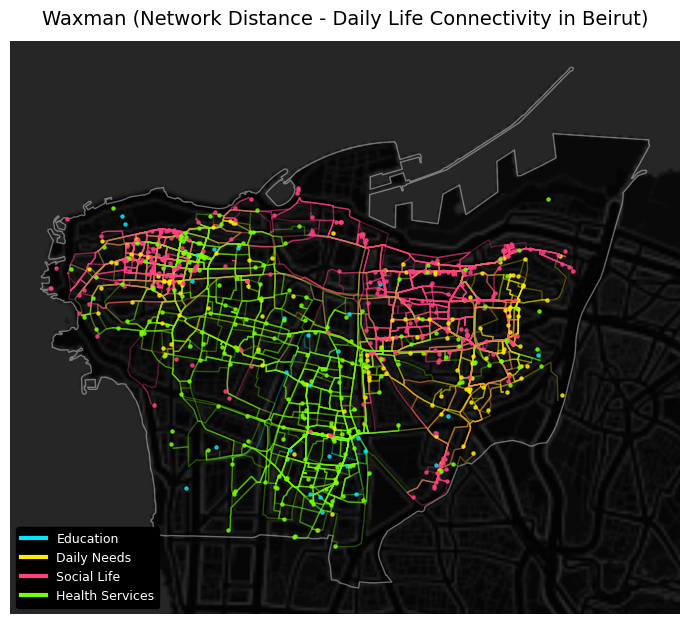

In [152]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))

admin.to_crs(epsg=3857).boundary.plot(ax=ax, color='white', linewidth=1.0, alpha=0.4, zorder=5)

for label, edges in wax_graphs.items():
    for _, row in edges.iterrows():
        x, y = row.geometry.xy
        ax.plot(x, y, color=layer_colors[label], linewidth=1.0, alpha=0.3, label=label, zorder=6)

for label, pois in poi_layers.items():
    pois.to_crs(3857).plot(ax=ax, markersize=5, color=layer_colors[label], alpha=0.8, zorder=7)

    # Legend
    legend_elements = [Line2D([0], [0], color=color, lw=3, label=label.replace("_"," ").title()) for label, color in layer_colors.items()]

    legend = ax.legend(
        handles=legend_elements,
        loc='lower left',
        bbox_to_anchor=(0, 0),
        frameon=True,
        framealpha=1,
        facecolor='black',
        edgecolor='black',
        fontsize=9,
        labelcolor='white',
        #title= "  " + city_name.split(",")[0],
        #title_fontproperties={'weight':'bold', 'size':15}
    )
    legend.get_title().set_color('white')


ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatterNoLabels, crs=3857, zoom=12, attribution=False)

ax.set_axis_off()
ax.set_title('Waxman (Network Distance - Daily Life Connectivity in Beirut)', fontsize=14, color='black', pad=12)
plt.tight_layout()
plt.show()

# Plotting for Multiple Cities

In [119]:
def plot_city_connectivity(city_name, admin, poi_layers, wax_graphs, radius):
    fig, ax = plt.subplots(1, 1, figsize=(6,6))
    fig.patch.set_facecolor('black')
    
    admin.boundary.plot(ax=ax, color='white', linewidth=2.0, alpha=0.6, zorder=5)

    for label in ['daily_needs', 'health_services', 'education', 'social_life']:
        edges = wax_graphs.get(label)
        if edges is None or edges.empty:
            continue
        color = layer_colors[label]
        for _, row in edges.iterrows():
            x, y = row.geometry.xy
            ax.plot(x, y, color=color, linewidth=2.0, alpha=0.05, zorder=6)
            ax.plot(x, y, color=color, linewidth=0.6, alpha=0.3, zorder=7)
    
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatterNoLabels, crs=3857, zoom=11, attribution=False)
    
    ax.set_axis_off()

    all_bounds = [gdf.total_bounds for gdf in wax_graphs.values() if not gdf.empty]

    minx = min(b[0] for b in all_bounds)
    miny = min(b[1] for b in all_bounds)
    maxx = max(b[2] for b in all_bounds)
    maxy = max(b[3] for b in all_bounds)

    buffer_x = (maxx - minx) * 0.05
    buffer_y = (maxy - miny) * 0.05

    zoom_minx = minx - buffer_x
    zoom_maxx = maxx + buffer_x
    zoom_miny = miny - buffer_y
    zoom_maxy = maxy + buffer_y

    ax.set_xlim(zoom_minx, zoom_maxx)
    ax.set_ylim(zoom_miny, zoom_maxy)

    outer_box = box(
        zoom_minx - buffer_x, zoom_miny - buffer_y,
        zoom_maxx + buffer_x, zoom_maxy + buffer_y
    )

    city_shape = admin.geometry.unary_union
    mask_geom = outer_box.difference(city_shape)
    gpd.GeoSeries([mask_geom], crs=admin.crs).plot(
        ax=ax, color='black', zorder=4
    )

    # Legend
    legend_elements = [Line2D([0], [0], color=color, lw=3, label=label.replace("_"," ").title()) for label, color in layer_colors.items()]

    legend = ax.legend(
        handles=legend_elements,
        loc='lower left',
        bbox_to_anchor=(0.02, -0.02),
        frameon=True,
        framealpha=1,
        facecolor='black',
        edgecolor='black',
        fontsize=9,
        labelcolor='white',
        title= "  " + city_name.split(",")[0],
        title_fontproperties={'weight':'bold', 'size':15}
    )
    legend.get_title().set_color('white')
    
    plt.tight_layout()
    plt.show()

#plot_city_connectivity(city_name, admin, poi_layers, wax_graphs, radius)

In [120]:
cities = ['Beirut, Lebanon', 'London, United Kingdom', 'Vienna, Austria']

radius = 500

layer_colors = {
    'education': '#00e5ff',
    'daily_needs': '#ffea00',
    'social_life': '#ff4081',
    'health_services': '#76ff03' 
}

poi_queries = {
    'education': {'amenity': ['school', 'university']},
    'daily_needs': {'shop': ['supermarket', 'convenience']},
    'social_life': {'amenity': ['restaurant']},
    'health_services': {'amenity': ['hospital', 'clinic', 'pharmacy']}
}


 Processing Beirut, Lebanon
education: 27 points
daily_needs: 140 points
social_life: 281 points
health_services: 220 points
education: 27 points, 7 edges
daily_needs: 140 points, 267 edges
social_life: 281 points, 1367 edges
health_services: 220 points, 603 edges


C:\Users\User\AppData\Local\Temp\ipykernel_25468\728267544.py:44: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  city_shape = admin.geometry.unary_union


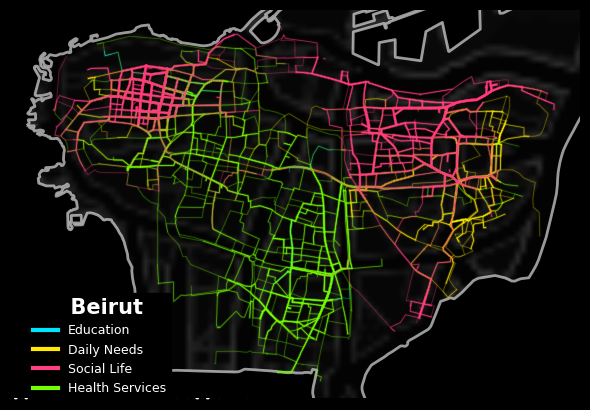


 Processing London, United Kingdom


KeyboardInterrupt: 

In [121]:
for city_name in cities:
    print(f'\n Processing {city_name}')

    # City & Road Network
    admin = ox.geocode_to_gdf(city_name).to_crs(3857)
    G = ox.graph_from_place(city_name, network_type='drive')
    segments_gdf = ox.graph_to_gdfs(G)[1].to_crs(3857)

    # POI Layers
    poi_layers = {}
    for label, query in poi_queries.items():
        poi = ox.features_from_place(city_name, query).to_crs(3857)
        poi_layers[label] = poi[poi.geometry.type == 'Point']
        print(f'{label}: {len(poi_layers[label])} points')

    # Build Waxman Graphs
    wax_graphs = {}
    for label, pois in poi_layers.items():
        if len(pois) > 1:
            nodes, edges = city2graph.waxman_graph(
                pois,
                distance_metric = 'network',
                r0 = radius,
                beta = 0.5,
                network_gdf = segments_gdf
            )
            wax_graphs[label] = edges
            print(f'{label}: {len(poi_layers[label])} points, {len(edges)} edges')
        else:
            wax_graphs[label] = gpd.GeoDataFrame()

    # Plot results
    plot_city_connectivity(city_name, admin, poi_layers, wax_graphs, radius)